In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
# import helper_functions as hf
from sklearn.linear_model import LogisticRegressionCV
seed = 123
from sklearn.model_selection import StratifiedKFold

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_pickle('cleaned_df.pkl')
df

,clothing_ID,Age,Title,Text,RAW_Text,review_len,Positive_fb_count,Division,Department,Class,Positively_rated,Reco
original_ind,,,,,,,,,,,,
0,767,33,NaN,absolutely wonderful silky and sexy and comf...,Absolutely wonderful - silky and sexy and comf...,53,0,Initmates,Intimate,Intimates,1,1
1,1080,34,NaN,love this dress it s sooo pretty i happene...,Love this dress! it's sooo pretty. i happene...,303,4,General,Dresses,Dresses,1,1
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,I had such high hopes for this dress and reall...,500,0,General,Dresses,Dresses,0,0
3,1049,50,my favorite buy,i love love love this jumpsuit it s fun fl...,"I love, love, love this jumpsuit. it's fun, fl...",124,0,General Petite,Bottoms,Pants,1,1
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,This shirt is very flattering to all due to th...,192,6,General,Tops,Blouses,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,great dress for many occasions,i was very happy to snag this dress at such a ...,I was very happy to snag this dress at such a ...,131,0,General Petite,Dresses,Dresses,1,1
23482,862,48,wish it was made of cotton,it reminds me of maternity clothes soft stre...,"It reminds me of maternity clothes. soft, stre...",223,0,General Petite,Tops,Knits,0,1
23483,1104,31,cute but see through,this fit well but the top was very see throug...,"This fit well, but the top was very see throug...",208,1,General Petite,Dresses,Dresses,0,0


In [4]:
comments = list(df.Text)
comments

['absolutely wonderful   silky and sexy and comfortable',
 'love this dress   it s sooo pretty   i happened to find it in a store  and i m glad i did bc i never would have ordered it online bc it s petite   i bought a petite and am 5 8    i love the length on me  hits just a little below the knee   would definitely be a true midi on someone who is truly petite ',
 'i had such high hopes for this dress and really wanted it to work for me  i initially ordered the petite small  my usual size  but i found this to be outrageously small  so small in fact that i could not zip it up  i reordered it in petite medium  which was just ok  overall  the top half was comfortable and fit nicely  but the bottom half had a very tight under layer and several somewhat cheap  net  over layers  imo  a major design flaw was the net over layer sewn directly into the zipper   it c',
 'i love  love  love this jumpsuit  it s fun  flirty  and fabulous  every time i wear it  i get nothing but great compliments ',


In [5]:
reviews = [c.split() for c in comments]
reviews

[['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable'],
 ['love',
  'this',
  'dress',
  'it',
  's',
  'sooo',
  'pretty',
  'i',
  'happened',
  'to',
  'find',
  'it',
  'in',
  'a',
  'store',
  'and',
  'i',
  'm',
  'glad',
  'i',
  'did',
  'bc',
  'i',
  'never',
  'would',
  'have',
  'ordered',
  'it',
  'online',
  'bc',
  'it',
  's',
  'petite',
  'i',
  'bought',
  'a',
  'petite',
  'and',
  'am',
  '5',
  '8',
  'i',
  'love',
  'the',
  'length',
  'on',
  'me',
  'hits',
  'just',
  'a',
  'little',
  'below',
  'the',
  'knee',
  'would',
  'definitely',
  'be',
  'a',
  'true',
  'midi',
  'on',
  'someone',
  'who',
  'is',
  'truly',
  'petite'],
 ['i',
  'had',
  'such',
  'high',
  'hopes',
  'for',
  'this',
  'dress',
  'and',
  'really',
  'wanted',
  'it',
  'to',
  'work',
  'for',
  'me',
  'i',
  'initially',
  'ordered',
  'the',
  'petite',
  'small',
  'my',
  'usual',
  'size',
  'but',
  'i',
  'found',
  'this',
  'to',
  'be',
 

1.Stemming / Lemmatizing : bringing all words back to their 'base form' in order to make an easier word count, and 2.Vectorizing : applying an algorithm that is based on wordcount (more advanced)

###### Step 2a : LancasterStemmer to bring words back to their base form

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

nltk.download('stopwords')

# Initialize the PorterStemmer object
stemmer = LancasterStemmer()

# Define the list of stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Remove stop words from each inner list
non_stop_words = []
for stemmed_words in reviews:
    non_stop_words.append([word for word in stemmed_words if word not in stop_words])

# Perform stemming on the non-stop words
stemmed_non_stop_words = []
for stemmed_words in non_stop_words:
    stemmed_non_stop_words.append([stemmer.stem(word) for word in stemmed_words])


In [8]:
# stemmed_non_stop_words

In [9]:
new_comms = []
for lists in stemmed_non_stop_words:
    new_comms.append(' '.join(lists))

In [10]:
new_comms

['absolv wond silky sexy comfort',
 'lov dress sooo pretty hap find stor glad bc nev would ord onlin bc petit bought petit 5 8 lov leng hit littl kne would definit tru mid someon tru petit',
 'high hop dress real want work init ord petit smal us siz found out smal smal fact could zip reord petit med ok overal top half comfort fit nic bottom half tight lay sev somewh cheap net lay imo maj design flaw net lay sewn direct zip c',
 'lov lov lov jumpsuit fun flirty fab every tim wear get noth gre comply',
 'shirt flat due adjust front tie perfect leng wear leg sleeveless pair wel cardig lov shirt',
 'lov tracy rees dress on petit 5 feet tal us wear 0p brand dress pretty pack lot dress skirt long ful overwhelm smal fram stranger alt short narrow skirt would tak away embel gar lov col ide styl work return dress',
 'ad basket hte last mintu see would look lik person stor pick went teh darkl col pal hte col real gorg turn mathc everythy try prefect littl baggy hte xs hte msallet siz bum petit d

In [11]:
df['Stemmed_Text'] = new_comms

In [15]:
# df.to_pickle('cleaned_df2.pkl')

In [12]:
#define our own train test split, as I wish to keep the train/test as seperate data frames for easy reference
def train_test_split_df (df,test_size = 0.2):
    idx = list(df.index)
    random.Random(seed).shuffle(idx)
    test_len = int(test_size * len(df))
    return df.loc[idx[test_len:]],df.loc[idx[:test_len]]

In [17]:
# data_train,data_test = train_test_split_df(df)

In [18]:
# data_train.to_pickle('train_set.pkl')
# data_test.to_pickle('test_set.pkl')

In [12]:
# data_train = pd.read_pickle('train_set.pkl')
# data_test = pd.read_pickle('test_set.pkl')

In [13]:
df.head()

,clothing_ID,Age,Title,Text,RAW_Text,review_len,Positive_fb_count,Division,Department,Class,Positively_rated,Reco,Stemmed_Text
original_ind,,,,,,,,,,,,,
0,767,33,NaN,absolutely wonderful silky and sexy and comf...,Absolutely wonderful - silky and sexy and comf...,53,0,Initmates,Intimate,Intimates,1,1,absolv wond silky sexy comfort
1,1080,34,NaN,love this dress it s sooo pretty i happene...,Love this dress! it's sooo pretty. i happene...,303,4,General,Dresses,Dresses,1,1,lov dress sooo pretty hap find stor glad bc ne...
2,1077,60,some major design flaws,i had such high hopes for this dress and reall...,I had such high hopes for this dress and reall...,500,0,General,Dresses,Dresses,0,0,high hop dress real want work init ord petit s...
3,1049,50,my favorite buy,i love love love this jumpsuit it s fun fl...,"I love, love, love this jumpsuit. it's fun, fl...",124,0,General Petite,Bottoms,Pants,1,1,lov lov lov jumpsuit fun flirty fab every tim ...
4,847,47,flattering shirt,this shirt is very flattering to all due to th...,This shirt is very flattering to all due to th...,192,6,General,Tops,Blouses,1,1,shirt flat due adjust front tie perfect leng w...


In [14]:
X = np.array(df.Stemmed_Text)
y = np.array(df.Reco)

In [15]:
vect = TfidfVectorizer()

In [16]:
X_vect = vect.fit(X)

In [18]:
tt_df = pd.DataFrame({'X_vectors':np.array(df.Stemmed_Text),'Y_vectors':y})

In [19]:
data_train,data_test = train_test_split_df(tt_df)

In [20]:
X = vect.transform(np.array(data_train.X_vectors))
y = np.array(data_train.Y_vectors)

In [22]:
def model_fit_train_score_skf(model, X, y, kfold=5,predict_proba = True):
    skf = StratifiedKFold(n_splits=kfold)
    results_dict = defaultdict()
    predict = []
    predict_prob = []
    Accuracy = []
    F1 = []
    AUC = []
    y_vals = []

    for train_index, test_index in skf.split(X, y):
        # get current split
        x_train, x_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        # fit model with latest train set
        model.fit(x_train, y_train)
        # calculate predictions
        y_pred = model.predict(x_val)
        if predict_proba:
            predictions = model.predict_proba(x_val)
            predict_prob.append(predictions[:, 1])
            AUC.append(roc_auc_score(y_val, predictions[:, 1]))
        y_vals.append(y_val)
        predict.append(y_pred)
        Accuracy.append(accuracy_score(y_true=y_val, y_pred=y_pred))
        F1.append(f1_score(y_true=y_val, y_pred=y_pred))


    if predict_proba:
        results_dict['predict_proba'] = predict_prob
        results_dict['AUC_std'] = np.std(AUC)
        results_dict['AUC_mean'] = np.mean(AUC)

    results_dict['y_val'] = y_vals
    results_dict['predictions'] = predict
    results_dict['Accuracy_mean'] = np.mean(Accuracy)
    results_dict['F1_mean'] = np.mean(F1)
    results_dict['Accuracy_std'] = np.std(Accuracy)
    results_dict['F1_std'] = np.std(F1)

    return model, results_dict


In [23]:
model = LogisticRegressionCV(Cs = [1,5,10],cv = 5,penalty =  'l2',max_iter = 500,random_state = seed,
         multi_class = 'ovr')

In [24]:
fitted_model,results = model_fit_train_score_skf(model,X, y)

In [25]:
print(f"Accuracy: {results['Accuracy_mean']*100:.3f} % \nF1 score: {results['F1_mean']:.3f} \nAUC score: {results['AUC_mean']:.3f}")

Accuracy: 88.713 % 
F1 score: 0.933 
AUC score: 0.920


In [26]:
def print_confusion_matrix(confusion_matrix, class_names,cmap='Greens', figsize=(10, 7), fontsize=10):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap=cmap)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

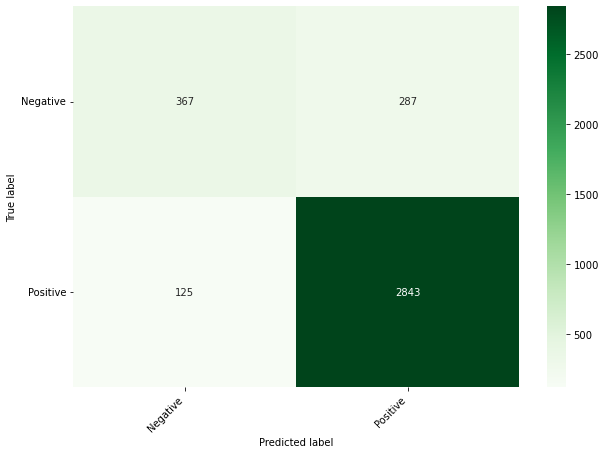

In [27]:
conf_mat = confusion_matrix(y_true=results['y_val'][0], y_pred=results['predictions'][0])
cm = print_confusion_matrix(conf_mat, ['Negative', 'Positive'])

In [28]:
def plot_ROC(y_true,y_proba,AUC,figsize = (7,5),color = 'darkturquoise',title='ROC Curve'):
    '''Helper function to plot ROC graph'''
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    #set size
    plt.figure(figsize=figsize)
    #plot
    plt.plot(fpr, tpr,lw=2,c=color,label = f"AUC: {AUC:.2f}")
    #adjustments
    plt.plot([0,1],[0,1],c='grey',ls='--')
    plt.legend()
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)

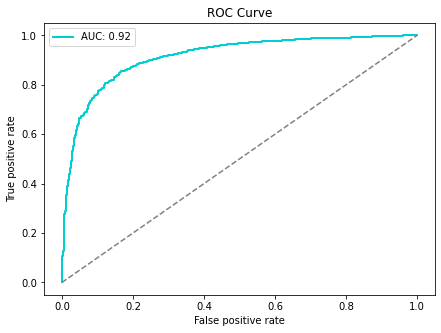

In [29]:
plot_ROC(results['y_val'][0],results['predict_proba'][0],results['AUC_mean'])

In [30]:
#try to see the 
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:15]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-16:-1]]))

Smallest Coefs:
['disappoint' 'poor' 'cheap' 'return' 'terr' 'hug' 'bad' 'matern' 'wast'
 'want' 'od' 'horr' 'unflat' 'back' 'sack']

Largest Coefs: 
['perfect' 'un' 'lov' 'gre' 'comply' 'comfort' 'littl' 'fun' 'glad'
 'comfy' 'recommend' 'sometim' 'amaz' 'complaint' 'happy']


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
results

defaultdict(None,
            {'predict_proba': [array([0.9845477 , 0.70047788, 0.02000808, ..., 0.25243903, 0.9679242 ,
                     0.82100943]),
              array([0.25749277, 0.98892535, 0.99418905, ..., 0.00454868, 0.81599056,
                     0.29361696]),
              array([0.99589781, 0.94575964, 0.9869503 , ..., 0.64765441, 0.9764479 ,
                     0.85627382]),
              array([0.94131288, 0.9962488 , 0.99653429, ..., 0.42949188, 0.77868599,
                     0.95940701]),
              array([0.99324704, 0.87546119, 0.47949379, ..., 0.37876947, 0.90427426,
                     0.45077749])],
             'AUC_std': 0.003952599899441642,
             'AUC_mean': 0.9201724956722372,
             'y_val': [array([1, 1, 0, ..., 0, 1, 1], dtype=int64),
              array([0, 1, 1, ..., 0, 0, 0], dtype=int64),
              array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
              array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
              array([1,

## Let us try to visualize some aspects

In [32]:
scoef = feature_names[sorted_coef_index[:15]]
lcoef = feature_names[sorted_coef_index[:-16:-1]]

In [33]:
maskp = df['Reco']==1
maskn = df['Reco']==0

In [34]:
textp = " ".join(review for review in df[maskp].Stemmed_Text)

In [35]:
textn = " ".join(review for review in df[maskn].Stemmed_Text)

In [36]:
positive_dict = dict()
negative_dict = dict()

In [37]:
for i in scoef:
    positive_dict[i]=0
for i in lcoef:
    negative_dict[i]=0

In [38]:
for positive in textp.split():
    if positive in positive_dict.keys():
        positive_dict[positive]+=1
for negative in textn.split():
    if negative in negative_dict.keys():
        negative_dict[negative]+=1

In [39]:
positive_dict

{'disappoint': 361,
 'poor': 29,
 'cheap': 120,
 'return': 852,
 'terr': 53,
 'hug': 418,
 'bad': 217,
 'matern': 106,
 'wast': 40,
 'want': 1486,
 'od': 148,
 'horr': 18,
 'unflat': 107,
 'back': 2215,
 'sack': 58}

In [40]:
negative_dict

{'perfect': 280,
 'un': 61,
 'lov': 1479,
 'gre': 534,
 'comply': 22,
 'comfort': 195,
 'littl': 363,
 'fun': 37,
 'glad': 24,
 'comfy': 51,
 'recommend': 113,
 'sometim': 23,
 'amaz': 39,
 'complaint': 12,
 'happy': 36}

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Admin\AppData\Local\Temp\ipykernel_10868\3836460222.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(keys, rotation=45, ha="right")


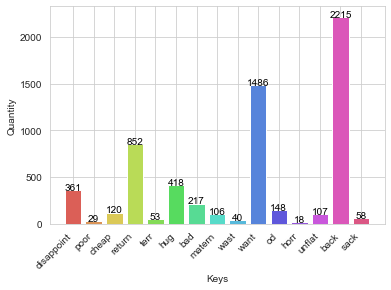

In [42]:
keys = list(positive_dict.keys())
values = list(positive_dict.values())

sns.set_style("whitegrid")

colors = sns.color_palette("hls", len(keys))

plt.bar(keys, values, color=colors)

plt.xlabel("Keys")
plt.ylabel("Quantity")
plt.gca().set_xticklabels(keys, rotation=45, ha="right")

for i, v in enumerate(values):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10868\3479977123.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(keys, rotation=45, ha="right")


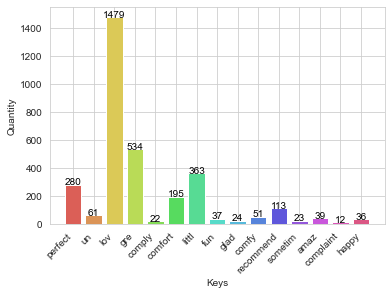

In [43]:
keys = list(negative_dict.keys())
values = list(negative_dict.values())

sns.set_style("whitegrid")

colors = sns.color_palette("hls", len(keys))

plt.bar(keys, values, color=colors)

plt.xlabel("Keys")
plt.ylabel("Quantity")
plt.gca().set_xticklabels(keys, rotation=45, ha="right")

for i, v in enumerate(values):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()

In [44]:
X_test = vect.transform(np.array(data_test.X_vectors))
y_test = np.array(data_test.Y_vectors)

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
print(f'Accuracy on test data is : {accuracy_score(y_test,y_pred)*100}')

Accuracy on test data is : 88.73426110006626


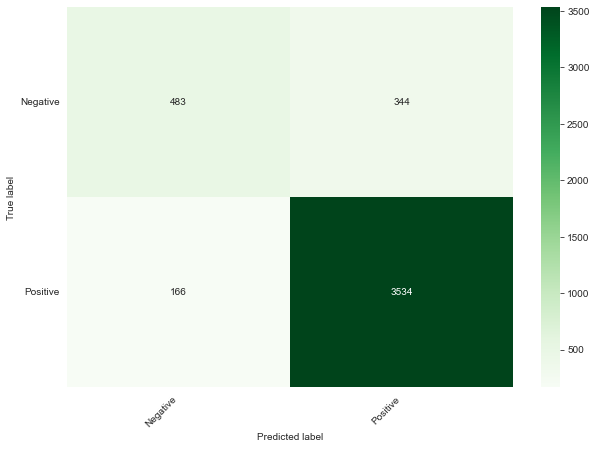

In [52]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Negative', 'Positive'])

<Figure size 1080x1080 with 0 Axes>

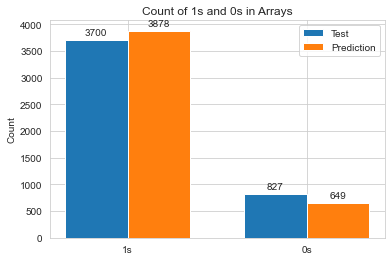

In [58]:
plt.figure(figsize=(15,15))
array1_counts = [list(y_test).count(1), list(y_test).count(0)]
array2_counts = [list(y_pred).count(1), list(y_pred).count(0)]

labels = ['1s', '0s']
x = list(range(len(labels)))  
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([val - width/2 for val in x], array1_counts, width, label='Test')
rects2 = ax.bar([val + width/2 for val in x], array2_counts, width, label='Prediction')

ax.set_ylabel('Count')
ax.set_title('Count of 1s and 0s in Arrays')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
